In [39]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import Model

In [380]:
sequence_length = 100
input_dim = 4

inputs = layers.Input(shape=[sequence_length,input_dim])
#x = layers.Reshape([sequence_length,input_dim,1])(inputs)
x = layers.SeparableConv1D(50,3,padding="same",activation="relu")(inputs)
x = layers.SeparableConv1D(10,3,padding="same",activation="linear")(x)

last_layer = Model(inputs,x)

x = layers.Flatten()(x)
x = layers.Dense(1)(x)

model = Model(inputs,x)
model.compile(loss="mse",optimizer="adam")

In [381]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_44 (InputLayer)        (None, 100, 4)            0         
_________________________________________________________________
separable_conv1d_19 (Separab (None, 100, 50)           262       
_________________________________________________________________
separable_conv1d_20 (Separab (None, 100, 10)           660       
_________________________________________________________________
flatten_18 (Flatten)         (None, 1000)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 1001      
Total params: 1,923
Trainable params: 1,923
Non-trainable params: 0
_________________________________________________________________


In [382]:
t=np.linspace(0,3,100)
l = []
y=np.random.choice([-1,1],size=100)
y[0] = -1
y[1] = 1

for i in range(100):
    x=np.c_[np.cos(2*np.pi*t),np.cos(2*np.pi*t**2),np.cos(2*np.pi*t**3),np.cos(2*np.pi*t**4)]
        
    if y[i] == -1:
        x=np.c_[np.cos(2*np.pi*t),np.cos(2*np.pi*t**2),np.cos(2*np.pi*t**3),np.cos(2*np.pi*t**4)]
        x[10,0] +=1
    if y[i] == -1:
        x=np.c_[np.cos(2*np.pi*t),np.cos(2*np.pi*t**2),np.cos(2*np.pi*t**3),np.cos(2*np.pi*t**4)]
        x[10,3] +=1

    x += np.random.normal(size=x.shape)*0.1
    l.append(x)
X=np.array(l)

In [383]:
model.fit(X,y,epochs=100)

Epoch 1/100
100/100 [==============================] - 1s 11ms/step - loss: 0.9980
Epoch 2/100
100/100 [==============================] - 0s 254us/step - loss: 0.9920
Epoch 3/100
100/100 [==============================] - 0s 574us/step - loss: 0.9891
Epoch 4/100
100/100 [==============================] - 0s 418us/step - loss: 0.9836
Epoch 5/100
100/100 [==============================] - 0s 543us/step - loss: 0.9824
Epoch 6/100
100/100 [==============================] - 0s 557us/step - loss: 0.9857
Epoch 7/100
100/100 [==============================] - 0s 473us/step - loss: 0.9858
Epoch 8/100
100/100 [==============================] - 0s 560us/step - loss: 0.9747
Epoch 9/100
100/100 [==============================] - 0s 458us/step - loss: 0.9717
Epoch 10/100
100/100 [==============================] - 0s 496us/step - loss: 0.9646
Epoch 11/100
100/100 [==============================] - 0s 417us/step - loss: 0.9694
Epoch 12/100
100/100 [==============================] - 0s 501us/step - los

100/100 [==============================] - 0s 759us/step - loss: 0.0238
Epoch 96/100
100/100 [==============================] - 0s 707us/step - loss: 0.0229
Epoch 97/100
100/100 [==============================] - 0s 482us/step - loss: 0.0227
Epoch 98/100
100/100 [==============================] - 0s 352us/step - loss: 0.0226
Epoch 99/100
100/100 [==============================] - 0s 650us/step - loss: 0.0262
Epoch 100/100
100/100 [==============================] - 0s 328us/step - loss: 0.0231


In [384]:
t=last_layer.predict(X)

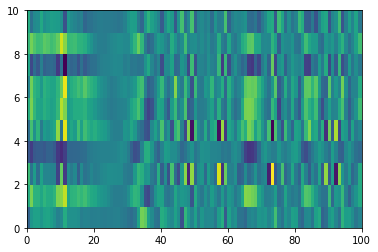

In [385]:
plt.pcolor(t[0].T)
plt.show()

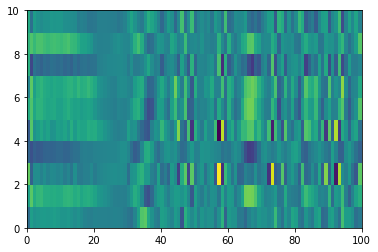

In [386]:
plt.pcolor(t[1].T)
plt.show()

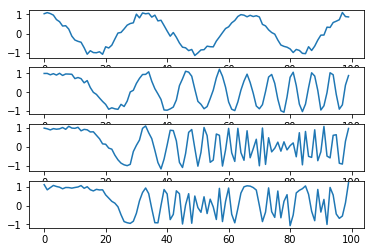

In [387]:
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.plot(X[1,:,i])
plt.show()

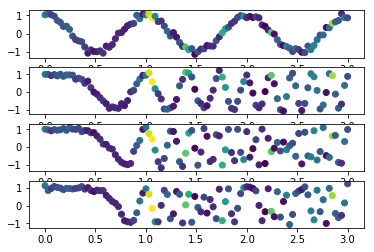

In [388]:
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.scatter(np.linspace(0,3,100),X[1,:,i],c=np.abs(t[1,:,0]))
plt.show()

In [389]:
import matplotlib.cm as cm

In [390]:
t.shape

(100, 100, 10)

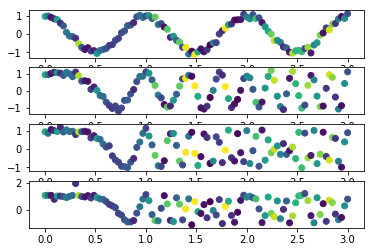

In [391]:
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.scatter(np.linspace(0,3,100),X[0,:,i],c=np.abs(t[0,:,9]))
plt.show()